## pipeline

In [1]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';') ## ;을 기준으로 분류해서 읽어라

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine]) ## 아래로 이어 붙이기

x = wine.drop('color', axis= 1)
y = wine['color']

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [3]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [4]:
pipe.steps[0]

('scaler', StandardScaler())

In [10]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [14]:
pipe.set_params(clf__max_depth = 2)
pipe.set_params(clf__random_state = 13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [15]:
from sklearn.model_selection import train_test_split

tr_data, te_data, tr_label, te_label = train_test_split(x, y , test_size=0.2,
                                                        random_state= 13,
                                                        stratify=y)

pipe.fit(tr_data, tr_label)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [16]:
from sklearn.metrics import accuracy_score

y_pred_tr =  pipe.predict(tr_data)
y_pred_te = pipe.predict(te_data)

print('train acc : ', accuracy_score(tr_label, y_pred_tr))
print('test acc : ', accuracy_score(te_label, y_pred_te))

train acc :  0.9657494708485664
test acc :  0.9576923076923077


### 모델 구조 확인

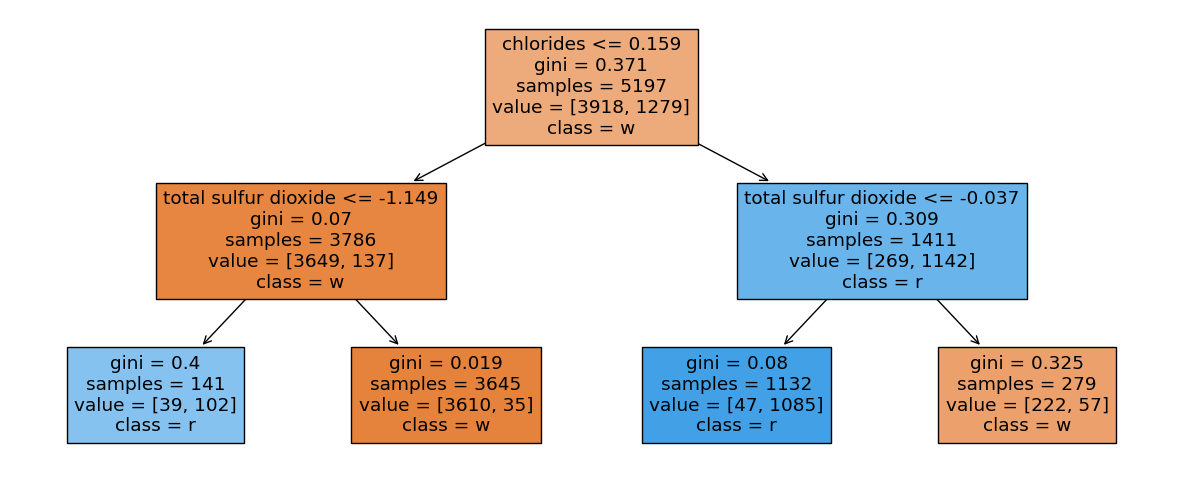

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(15, 6))
_ = tree.plot_tree(pipe['clf'],
                   feature_names=list(tr_data.columns),
                   class_names=["w", 'r'],
                   filled=True)